<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Material-Science/blob/main/code_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Method to solve the equation

In [ ]:
import numpy as np

def calculate(b0, d1, d2, ee, ei, ep):
  if(abs((ep-ei)/(ei+ee))<1):
    result = b0 - d1 * ((abs((ep-ei)/(ei+ee)) * np.arctanh((ep-ei)/(ei+ee))) - (d2 * ((ep-ei)/(ei+ee))));
  return result;

In [ ]:
b0 = 2775;
d1 = 560;
d2 = 0.05;
ee = 0.001;
ei = 0.165;
ep = 0.04;
print(calculate(b0, d1, d2, ee, ei, ep))

3167.1162169659724


# Find the best b0 value

In [29]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    mse = np.mean((np.array(original_results) - np.array(calculated_results)) ** 2)
    return mse

# Iterate over B0 values and find the one with least MSE
d1 = 560;
d2 = 0.05;
ee = 0.001;
ei = 0.165;
ep = 0.04;
best_b0 = None
min_mse = float('inf')
count=0;
for b0 in range(1520, 6201, 10):
    count+=1
    mse = calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results)
    if mse < min_mse:
        min_mse = mse
        best_b0 = b0
print("Count:",count)
print("Best B0 value:", best_b0)
print("Corresponding MSE:", min_mse)


Count: 469
Best B0 value: 2880
Corresponding MSE: 149104.67497364077


# Find the best d1 and d2 values.


In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    mse = np.mean((np.array(original_results) - np.array(calculated_results)) ** 2)
    return mse

# Initialize variables to store best parameters
b0 = 2775;
ee = 0.001;
ei = 0.165;
best_d1 = None
best_d2 = None
min_mse = float('inf')

# Nested loops to iterate over d1 and d2 values
for d1 in range(400, 10001, 10):
    for d2 in np.arange(0.05, 0.34, 0.05):
        mse = calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results)
        if mse < min_mse:
            min_mse = mse
            best_d1 = d1
            best_d2 = d2

print("Best d1 value:", best_d1)
print("Best d2 value:", best_d2)
print("Corresponding MSE:", min_mse)


Best d1 value: 560
Best d2 value: 0.05
Corresponding MSE: 160520.66894441843


# Find the best b0, d1 and d2 values

In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)
    mse = np.mean((np.array(original_results) - np.array(calculated_results)) ** 2)
    return mse

# Initialize variables to store best parameters
ee = 0.001;
ei = 0.165;
best_b0 = None
best_d1 = None
best_d2 = None
min_mse = float('inf')

# Nested loops to iterate over B0, D1, and D2 values
for b0_value in range(1520, 6201, 10):
    for d1_value in range(400, 10001, 20):
        for d2_value in np.arange(0.05, 0.34, 0.1):
            mse_value = calculate_mse(b0_value, d1_value, d2_value, ee, ei, ep_values, original_results)
            if mse_value < min_mse:
                min_mse = mse_value
                best_b0 = b0_value
                best_d1 = d1_value
                best_d2 = d2_value

print("Best B0 value:", best_b0)
print("Best D1 value:", best_d1)
print("Best D2 value:", best_d2)
print("Corresponding MSE:", min_mse)


Best B0 value: 2880
Best D1 value: 540
Best D2 value: 0.05
Corresponding MSE: 149053.47152937905


# Find the best d1, d2 and ei values

In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_calculated_results = [result for result in calculated_results if result is not None]  # Filter out None values
    mse = np.mean((np.array(original_results[:len(valid_calculated_results)]) - np.array(valid_calculated_results)) ** 2)
    return mse

# Initialize variables to store best parameters
ee = 0.001;
b0 = 2880;
best_d1 = None
best_d2 = None
best_ei = None
min_mse = float('inf')

# Nested loops to iterate over B0, D1, D2, and Ei values
for b0_value in range(1520, 6201, 10):
    for d1_value in range(400, 10001, 20):
        for d2_value in np.arange(0.05, 0.34, 0.05):
            for ei_value in np.arange(0.09, 0.285, 0.5):
                mse_value = calculate_mse(b0, d1_value, d2_value, ee, ei_value, ep_values, original_results)
                if mse_value < min_mse:
                    min_mse = mse_value
                    best_d1 = d1_value
                    best_d2 = d2_value
                    best_ei = ei_value

print("Best D1 value:", best_d1)
print("Best D2 value:", best_d2)
print("Best Ei value:", best_ei)
print("Corresponding MSE:", min_mse)


Best D1 value: 440
Best D2 value: 0.05
Best Ei value: 0.09
Corresponding MSE: 151741.59449007924


# Find the best b0, d1, d2 and ei values

In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_results = [result for result in calculated_results if result is not None]  # Filter out None values
    mse = np.mean((np.array(original_results[:len(valid_results)]) - np.array(valid_results)) ** 2)
    return mse

# Initialize variables to store best parameters
ee = 0.001;
best_b0 = None
best_d1 = None
best_d2 = None
best_ei = None
min_mse = float('inf')

# Nested loops to iterate over B0, D1, D2, and Ei values
for b0_value in range(1520, 6201, 10):
    for d1_value in range(400, 10001, 20):
        for d2_value in np.arange(0.05, 0.34, 0.05):
            for ei_value in np.arange(0.09, 0.285, 0.1):
                mse_value = calculate_mse(b0_value, d1_value, d2_value, ee, ei_value, ep_values, original_results)
                if mse_value < min_mse:
                    min_mse = mse_value
                    best_b0 = b0_value
                    best_d1 = d1_value
                    best_d2 = d2_value
                    best_ei = ei_value

print("Best B0 value:", best_b0)
print("Best D1 value:", best_d1)
print("Best D2 value:", best_d2)
print("Best Ei value:", best_ei)
print("Corresponding MSE:", min_mse)


Best B0 value: 3140
Best D1 value: 440
Best D2 value: 0.05
Best Ei value: 0.09
Corresponding MSE: 82696.978273863


## Find b0 using interpolation

Cubic Polynomial Coefficients: [ 7.31356743e+00  1.95938002e+06 -1.56997104e+06  4.20104939e+05
 -4.54570942e+04  4.55780103e+03]

Polynomial Equation: 7.313567 x^5 + 1959380.017111 x^4 + -1569971.044005 x^3 + 420104.939062 x^2 + -45457.094188 x^1 + 4557.801026

Derivative Equation: 36.567837 x^4 + 7837520.068442 x^3 + -4709913.132016 x^2 + 840209.878125 x^1 + -45457.094188

Roots (Zeros) of the Derivative Equation: [-2.14328838e+05  3.28043639e-01  1.67079982e-01  1.05819510e-01]

For x = -214328.838110, y = 826940678179840432906698752.000000
For x = 0.328044, y = 2122.522092
For x = 0.167080, y = 2894.690659
For x = 0.105820, y = 2837.153082



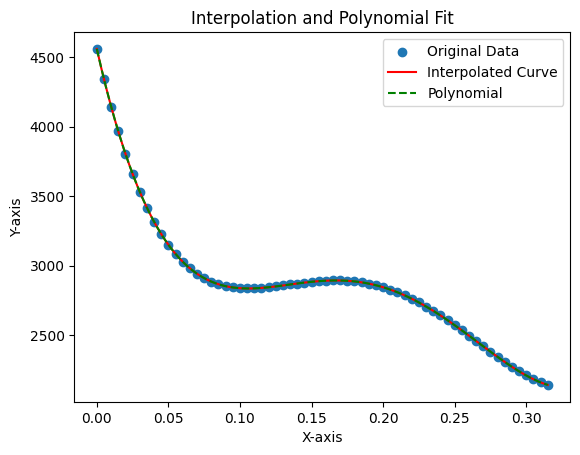

In [34]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['t.strain'].values
y = df['hard.Rate'].values


# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Set the value of k for spline interpolation
k_value = 5

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{k_value-1 -i} + " if i < k_value-1 else f"{coef:.6f}"
    # cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the derivative equation
roots = np.roots(derivative_coefficients)
print("Roots (Zeros) of the Derivative Equation:", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()


In [28]:
b0_values = y_roots
b0_values

# Calculate the median of b0
median_b0 = np.median(b0_values)

# Find the index of the value farthest from the median
idx_odd_one_out = np.argmax(np.abs(b0_values - median_b0))

# Remove the odd one out
b0_filtered = np.delete(b0_values, idx_odd_one_out)

print("Filtered b0 array:", b0_filtered)

# Sort the b0 values from lowest to highest
b0_sorted = np.sort(b0_filtered)

# Initialize an empty list to store the values
b0_interval = []

# Iterate over the range of b0 values with a step of 10
for i in range(int(b0_sorted[0]), int(b0_sorted[-1]), 10):
    b0_interval.append(i)

print("b0 values from lowest to highest in intervals of 10:")
print(b0_interval)
# Calculate the average of the b0 values
b0_average = np.mean(b0_filtered)

print("Average of the b0 values:", b0_average)



Filtered b0 array: [2241.33966085 2985.92668246 2758.71755245]
b0 values from lowest to highest in intervals of 10:
[2241, 2251, 2261, 2271, 2281, 2291, 2301, 2311, 2321, 2331, 2341, 2351, 2361, 2371, 2381, 2391, 2401, 2411, 2421, 2431, 2441, 2451, 2461, 2471, 2481, 2491, 2501, 2511, 2521, 2531, 2541, 2551, 2561, 2571, 2581, 2591, 2601, 2611, 2621, 2631, 2641, 2651, 2661, 2671, 2681, 2691, 2701, 2711, 2721, 2731, 2741, 2751, 2761, 2771, 2781, 2791, 2801, 2811, 2821, 2831, 2841, 2851, 2861, 2871, 2881, 2891, 2901, 2911, 2921, 2931, 2941, 2951, 2961, 2971, 2981]
Average of the b0 values: 2661.9946319199225


In [35]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    mse = np.mean((np.array(original_results) - np.array(calculated_results)) ** 2)
    return mse

# Iterate over B0 values and find the one with least MSE
d1 = 560;
d2 = 0.05;
ee = 0.001;
ei = 0.165;
ep = 0.04;
best_b0 = None
min_mse = float('inf')
count=0
for b0 in range(int(b0_sorted[0]), int(b0_sorted[-1]), 10):
    count+=1
    mse = calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results)
    if mse < min_mse:
        min_mse = mse
        best_b0 = b0
print("Count:", count)
print("Best B0 value:", best_b0)
print("Corresponding MSE:", min_mse)


Count: 75
Best B0 value: 2841
Corresponding MSE: 19541.03741980286


In [36]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_results = [result for result in calculated_results if result is not None]  # Filter out None values
    mse = np.mean((np.array(original_results[:len(valid_results)]) - np.array(valid_results)) ** 2)
    return mse

# Initialize variables to store best parameters
ee = 0.0001;
best_b0 = None
best_d1 = None
best_d2 = None
best_ei = None
min_mse = float('inf')

# Nested loops to iterate over B0, D1, D2, and Ei values
for b0_value in range(int(b0_sorted[0]), int(b0_sorted[-1]), 10):
    for d1_value in range(400, 10001, 20):
        for d2_value in np.arange(0.05, 0.34, 0.05):
            for ei_value in np.arange(0.09, 0.285, 0.1):
                mse_value = calculate_mse(b0_value, d1_value, d2_value, ee, ei_value, ep_values, original_results)
                if mse_value < min_mse:
                    min_mse = mse_value
                    best_b0 = b0_value
                    best_d1 = d1_value
                    best_d2 = d2_value
                    best_ei = ei_value

print("Best B0 value:", best_b0)
print("Best D1 value:", best_d1)
print("Best D2 value:", best_d2)
print("Best Ei value:", best_ei)
print("Corresponding MSE:", min_mse)


Best B0 value: 2721
Best D1 value: 660
Best D2 value: 0.05
Best Ei value: 0.19
Corresponding MSE: 34802.66126894168
